In [0]:
#Description: This progeam uses dual moving average crossover to determine when buy and sell a stock
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving APPL.csv to APPL.csv


In [0]:
#Store the data 
AAPL = pd.read_csv('APPL.csv')
#Show the data
AAPL

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44
491,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36
492,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14
493,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07


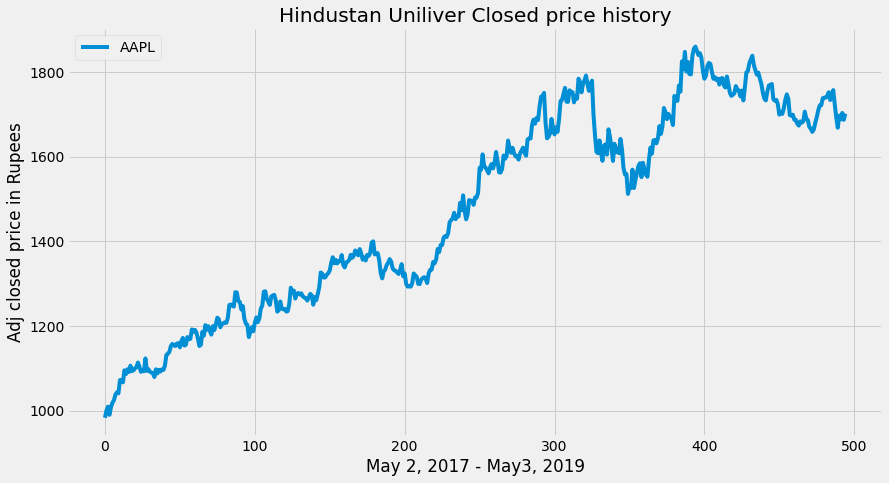

In [0]:
#Visualise the data
plt.figure(figsize=(13, 7))
plt.plot(AAPL['Close Price'], label= 'AAPL')
plt.title('Hindustan Uniliver Closed price history')
plt.xlabel('May 2, 2017 - May3, 2019')
plt.ylabel('Adj closed price in Rupees')
plt.legend(loc= 'upper left')
plt.show()

In [0]:
#Create the simple moving average with a 10 day window
SMA10 = pd.DataFrame()
SMA10['Close Price'] = AAPL['Close Price'].rolling(window=10).mean()
SMA10

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
490,1725.940
491,1720.825
492,1716.780
493,1710.265


In [0]:
#Creating a simple moving average with 30 day window
SMA30 = pd.DataFrame()
SMA30['Close Price'] = AAPL['Close Price'].rolling(window=30).mean()
SMA30

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
490,1703.328333
491,1703.366667
492,1704.223333
493,1704.676667


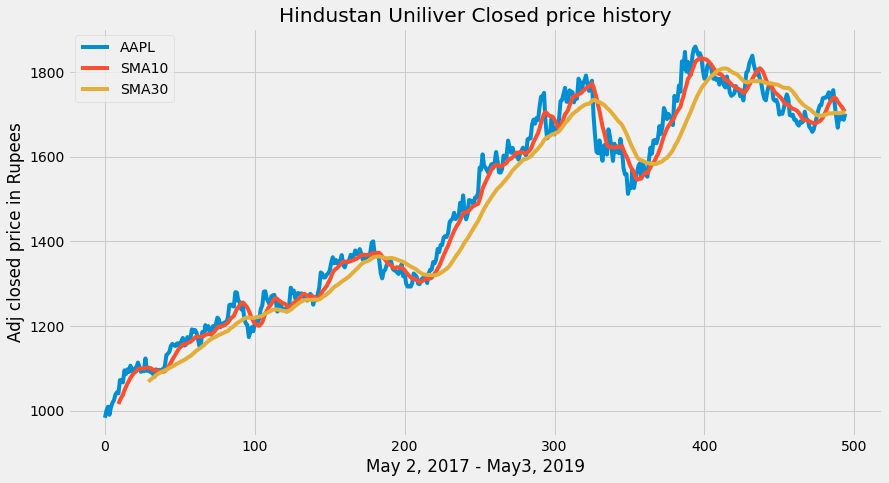

In [0]:
# Visualising above data
plt.figure(figsize=(13, 7))
plt.plot(AAPL['Close Price'], label= 'AAPL')
plt.plot(SMA10['Close Price'], label = 'SMA10')
plt.plot(SMA30['Close Price'], label = 'SMA30')
plt.title('Hindustan Uniliver Closed price history')
plt.xlabel('May 2, 2017 - May3, 2019')
plt.ylabel('Adj closed price in Rupees')
plt.legend(loc= 'upper left')
plt.show()

In [0]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL']= AAPL['Close Price']
data['SMA10']= SMA10['Close Price']
data['SMA30']= SMA30['Close Price']
data

,AAPL,SMA10,SMA30
0,983.25,NaN,NaN
1,1000.40,NaN,NaN
2,1009.40,NaN,NaN
3,990.25,NaN,NaN
4,1008.00,NaN,NaN
...,...,...,...
490,1697.50,1725.940,1703.328333
491,1688.70,1720.825,1703.366667
492,1703.75,1716.780,1704.223333
493,1687.45,1710.265,1704.676667


In [0]:
#Create a function to signal when to buy and sell the asset
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag = -1

  for i in range(len(data)):
    if data[SMA10][i] > data[SMA30][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
       sigPriceBuy.append(np.nan)
       sigPriceSell.append(np.nan)
    elif data['SMA10'][i] < data['SMA30'][i] :
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan) 
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return(sigPriceBuy, sigPriceSell)

In [0]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data) 
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

KeyError: ignored

In [0]:
data


,AAPL,SMA10,SMA30
0,983.25,NaN,NaN
1,1000.40,NaN,NaN
2,1009.40,NaN,NaN
3,990.25,NaN,NaN
4,1008.00,NaN,NaN
...,...,...,...
490,1697.50,1725.940,1703.328333
491,1688.70,1720.825,1703.366667
492,1703.75,1716.780,1704.223333
493,1687.45,1710.265,1704.676667


NameError: ignored

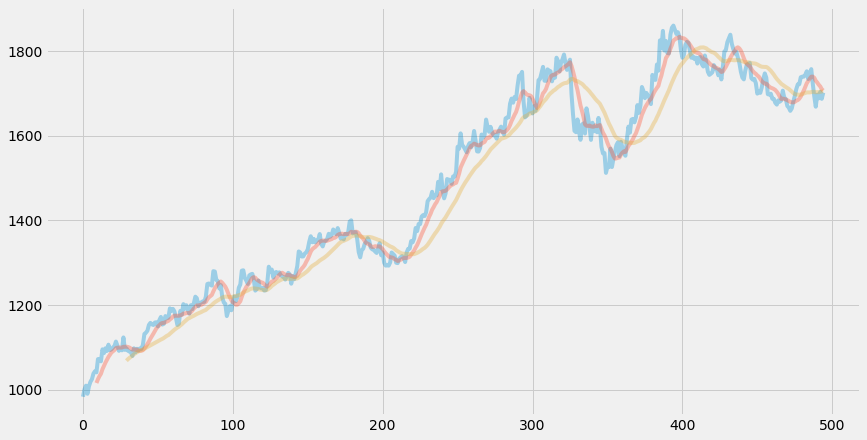

In [0]:
#Visualize the data
plt.figure(figsize = (13,7))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA10'], label = 'SMA10', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.scatter(data.index, data[Buy_Signal_Price], label = 'Buy', marker = '^', color = 'green' )
plt.scatter(data.index, data[Sell_Signal_Price], label = 'Sell', marker = 'v', color = 'red' )
plt.title('Hindustan Uniliver Closed price history')
plt.xlabel('May 2, 2017 - May3, 2019')
plt.ylabel('Adj closed price in Rupees')
plt.legend(loc= 'upper left')
plt.show()
